<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Librairies et Données

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
from wordcloud import WordCloud # Visualisation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import words
import spacy
from spacy import displacy


import mlflow
from mlflow.models import infer_signature


# from google.colab import drive
# drive.mount('/content/drive')

In [203]:
# NOTE: review the links mentioned above for guidance on connecting to a managed tracking server, such as the free Databricks Community Edition

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [204]:
df=pd.read_csv('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/QueryResultsP5.csv', sep=',')
df.head()

,LastActivityDate,Title,Tags,Score
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399


# Partie 2 : Exploratory Data Analysis

In [205]:
print(df.shape)

(50, 4)


In [206]:
df.isnull().sum()

LastActivityDate    0
Title               0
Tags                0
Score               0
dtype: int64

In [207]:
df.duplicated().sum()

0

In [208]:
df.dtypes

LastActivityDate    object
Title               object
Tags                object
Score                int64
dtype: object

In [209]:
df['Title'].nunique()

50

In [210]:
df['Tags'].nunique()

47

In [211]:
df['Score'].nunique()

48

In [212]:
#Résumé stat
df.describe(include="all").round(2)

,LastActivityDate,Title,Tags,Score
count,50,50,50,50.00
unique,50,50,47,NaN
top,2022-08-29 20:14:36,Determine the type of an object?,<python>,NaN
freq,1,1,3,NaN
mean,NaN,NaN,NaN,563.28
std,NaN,NaN,NaN,406.65
min,NaN,NaN,NaN,259.00
25%,NaN,NaN,NaN,321.50
50%,NaN,NaN,NaN,406.50
75%,NaN,NaN,NaN,607.00


In [213]:
df.columns

Index(['LastActivityDate', 'Title', 'Tags', 'Score'], dtype='object')

## Outliers

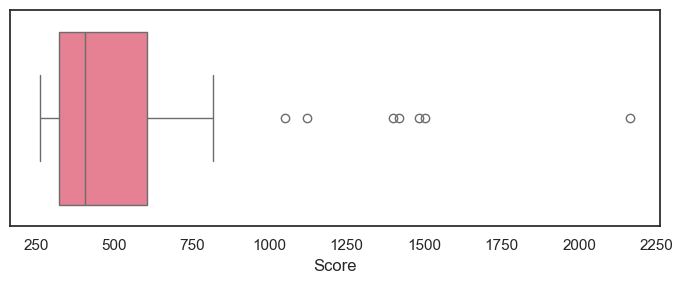

In [214]:
# Visualisation des outliers
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

## Histogramme

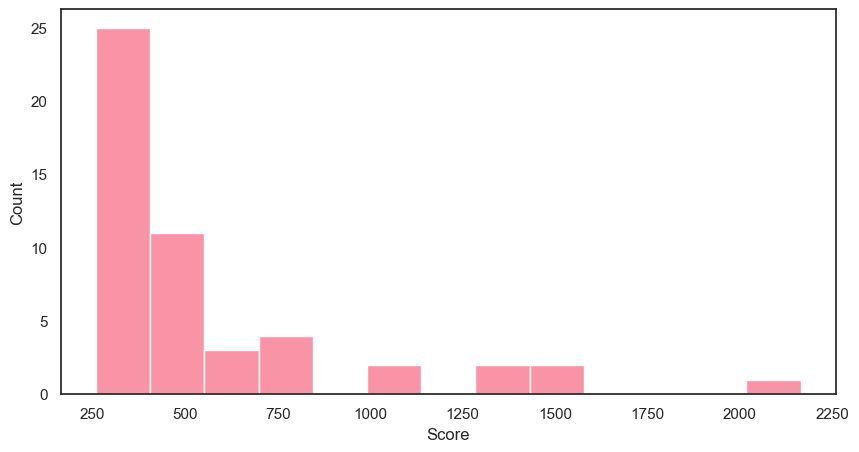

<Figure size 640x480 with 0 Axes>

In [215]:
# Visualisation des histogrammes de la variable Score
plt.figure(figsize=(10, 5))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')
plt.show()

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")

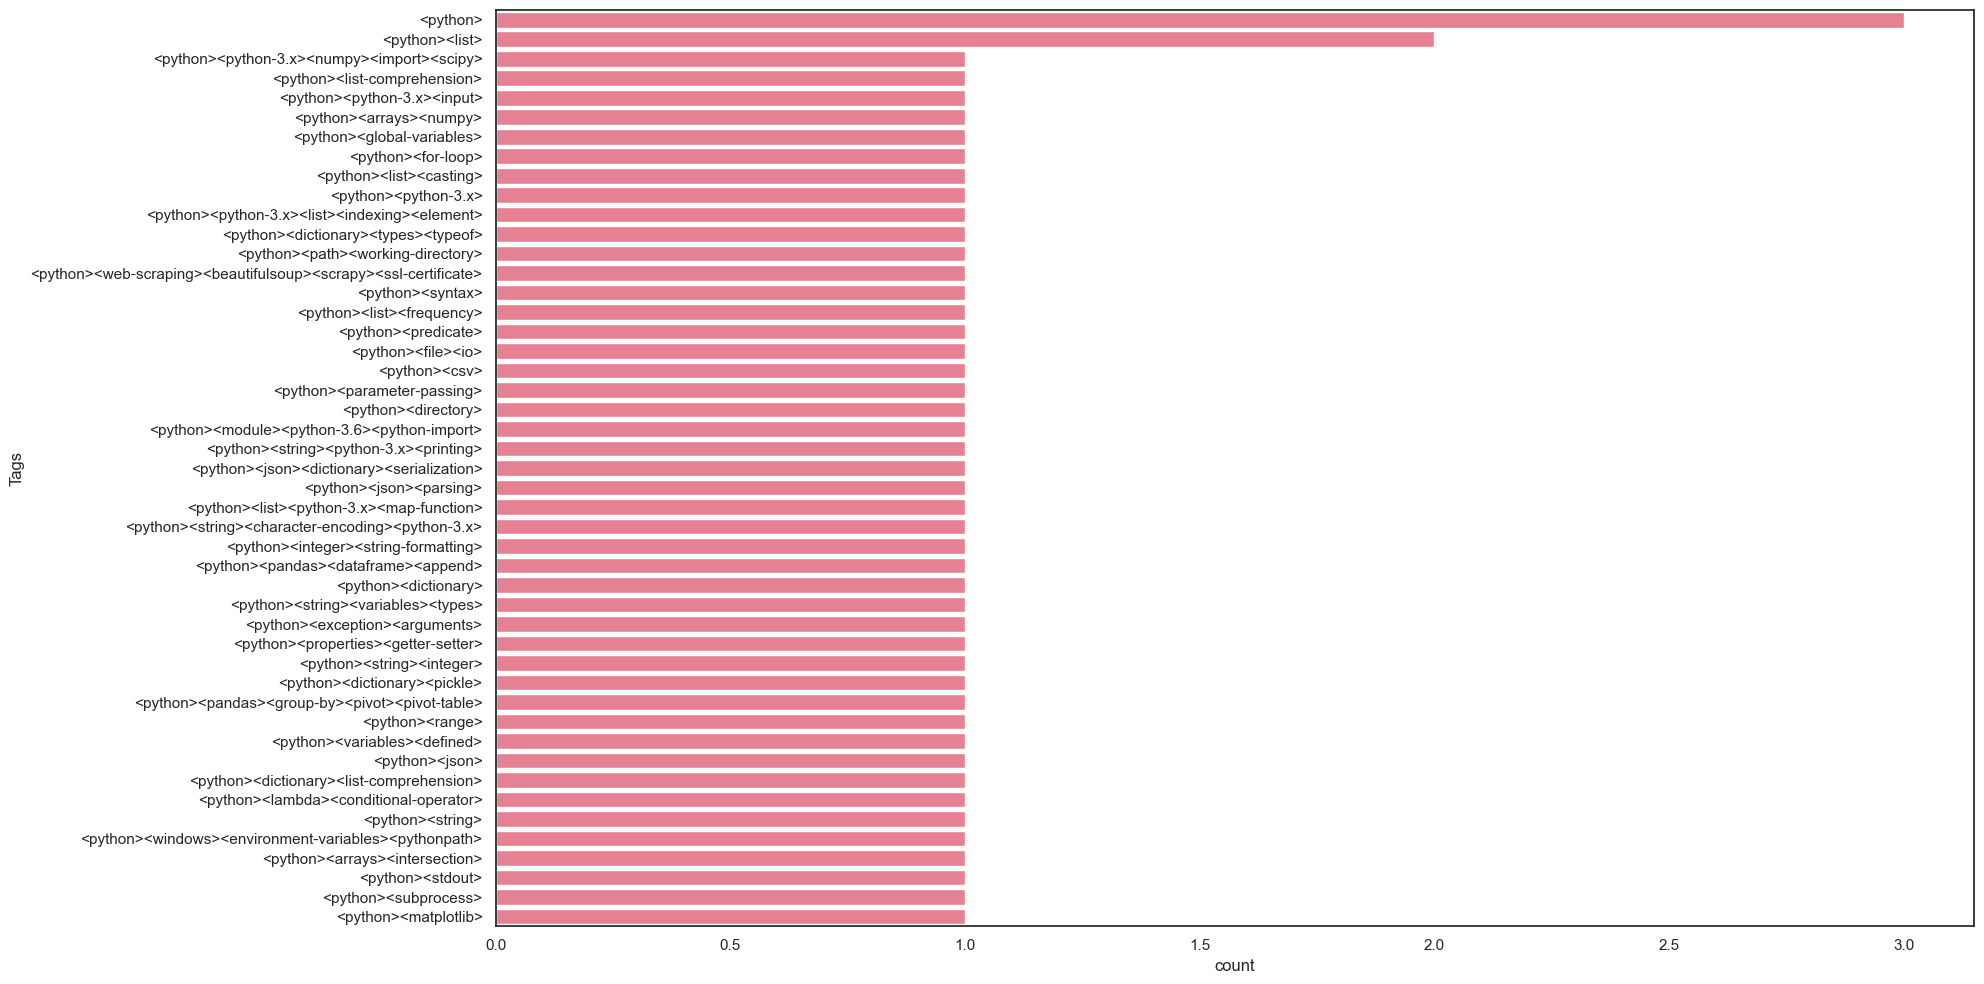

In [216]:
# Visualisation des histogrammes de la variable tags
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
sns.countplot(data=df, y='Tags', order=df['Tags'].value_counts(ascending=False).index)

# Espacement entre les graphiques
plt.tight_layout()

plt.savefig("tags.png")

## WordCloud

/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.RO

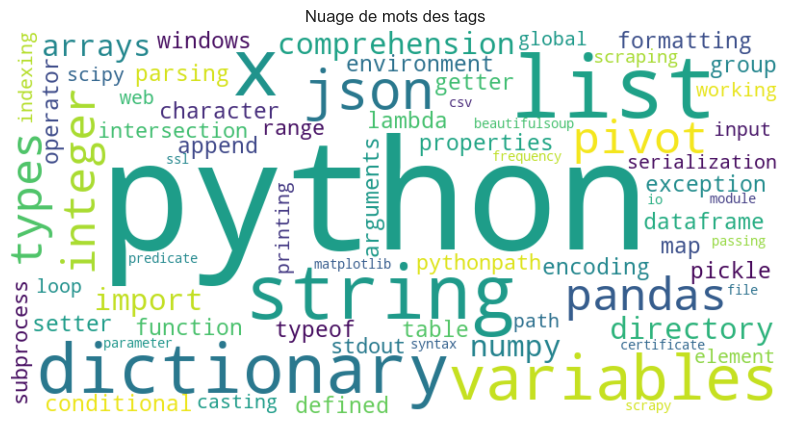

In [217]:
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Tags'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.R

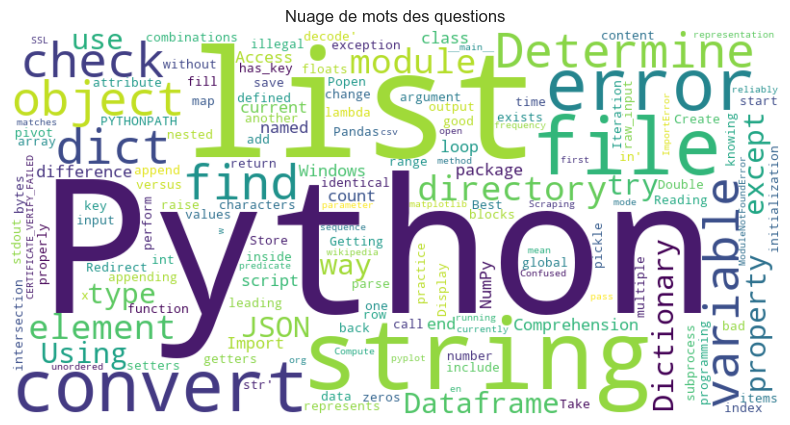

In [218]:
# Convertir la liste en une chaîne de caractères
text = ' '.join(df['Title'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des questions')
plt.show()

In [219]:
for index, vect in df.iterrows():
  print(vect['Title'])

Determine the type of an object?
Why can't Python parse this JSON data?
Best way to convert string to bytes in Python 3?
Display number with leading zeros
Create a Pandas Dataframe by appending one row at a time
Should I use 'has_key()' or 'in' on Python dicts?
How to check if type of a variable is string?
Which exception should I raise on bad/illegal argument combinations in Python?
Using @property versus getters and setters
How can I check if a string represents an int, without using try/except?
How can I use pickle to save a dict (or any other Python object)?
Getting a map() to return a list in Python 3.x
How can I pivot a dataframe?
Determine if variable is defined in Python
Reading JSON from a file
Python Dictionary Comprehension
Is there a way to perform "if" in python's lambda?
Convert a list of characters into a string
How to add to the PYTHONPATH in Windows, so it finds my modules/packages?
How to find list intersection?
Redirect stdout to a file in Python?
Store output of sub

In [220]:
for index, vect in df.iterrows():
  print(vect['Tags'])

<python><dictionary><types><typeof>
<python><json><parsing>
<python><string><character-encoding><python-3.x>
<python><integer><string-formatting>
<python><pandas><dataframe><append>
<python><dictionary>
<python><string><variables><types>
<python><exception><arguments>
<python><properties><getter-setter>
<python><string><integer>
<python><dictionary><pickle>
<python><list><python-3.x><map-function>
<python><pandas><group-by><pivot><pivot-table>
<python><variables><defined>
<python><json>
<python><dictionary><list-comprehension>
<python><lambda><conditional-operator>
<python><string>
<python><windows><environment-variables><pythonpath>
<python><arrays><intersection>
<python><stdout>
<python><subprocess>
<python><range>
<python><json><dictionary><serialization>
<python><path><working-directory>
<python>
<python><list-comprehension>
<python><python-3.x><input>
<python><arrays><numpy>
<python><global-variables>
<python><for-loop>
<python><list><casting>
<python><python-3.x>
<python><python-

# Partie 3 : Analyse textuelle


In [221]:
# Fixer la graine aléatoire pour stabiliser l'échantillonnage
#np.random.seed(42)

In [222]:
doc = df.Title
doc

0                      Determine the type of an object?
1                Why can't Python parse this JSON data?
2      Best way to convert string to bytes in Python 3?
3                     Display number with leading zeros
4     Create a Pandas Dataframe by appending one row...
5     Should I use 'has_key()' or 'in' on Python dicts?
6         How to check if type of a variable is string?
7     Which exception should I raise on bad/illegal ...
8            Using @property versus getters and setters
9     How can I check if a string represents an int,...
10    How can I use pickle to save a dict (or any ot...
11       Getting a map() to return a list in Python 3.x
12                         How can I pivot a dataframe?
13           Determine if variable is defined in Python
14                             Reading JSON from a file
15                      Python Dictionary Comprehension
16    Is there a way to perform "if" in python's lam...
17           Convert a list of characters into a

In [223]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Séparer par mot (tableaux de mots)
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

def stemm_fct(list_words) :
    stemmer = PorterStemmer()
    stem_w = [stemmer.stem(w) for w in list_words]
    return stem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text


# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

df['sentence_bow'] = df['Title'].apply(lambda x : transform_bow_fct(x))
df['sentence_bow_lem'] = df['Title'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['Title'].apply(lambda x : transform_dl_fct(x))
df.shape
df

,LastActivityDate,Title,Tags,Score,sentence_bow,sentence_bow_lem,sentence_dl
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164,determine type object,determine type object,determine the type of an object ?
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503,why n't python parse json data,why n't python parse json data,why ca n't python parse this json data ?
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482,best way convert string bytes python,best way convert string byte python,best way to convert string to bytes in python 3 ?
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419,display number leading zeros,display number leading zero,display number with leading zeros
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399,create pandas dataframe appending one row time,create panda dataframe appending one row time,create a pandas dataframe by appending one row...
5,2022-11-23 08:30:50,Should I use 'has_key()' or 'in' on Python dicts?,<python><dictionary>,1122,should use 'has_key 'in python dicts,should use 'has_key 'in python dicts,should i use 'has_key ( ) ' or 'in ' on python...
6,2022-08-15 07:57:04,How to check if type of a variable is string?,<python><string><variables><types>,1051,how check type variable string,how check type variable string,how to check if type of a variable is string ?
7,2023-01-27 10:02:02,Which exception should I raise on bad/illegal ...,<python><exception><arguments>,820,which exception raise bad illegal argument com...,which exception raise bad illegal argument com...,which exception should i raise on bad illegal ...
8,2022-05-31 17:20:40,Using @property versus getters and setters,<python><properties><getter-setter>,798,using property versus getters setters,using property versus getters setter,using property versus getters and setters
9,2023-01-29 17:03:17,"How can I check if a string represents an int,...",<python><string><integer>,733,how check string represents int without using ...,how check string represents int without using ...,how can i check if a string represents an int ...


In [224]:
df.to_csv("data_titres.csv")

In [225]:
df =  pd.read_csv("data_titres.csv")
print(df.shape)

(50, 8)


In [226]:
from nltk.tokenize import sent_tokenize, word_tokenize

df['length_bow'] = df['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())
df['length_bow_lem'] = df['sentence_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", df['length_bow_lem'].max())
df['length_dl'] = df['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())

max length bow :  9
max length bow lem :  9
max length dl :  20


# Partie 4 : Extraction de caractéristiques

## Bag-of-words (bow)

On va transformer le vecteur corpus qui contient des chaînes de caractères en une matrice d’entiers.

La matrice contient autant de colonnes que de mots possibles dans le corpus.

On compte le nombre d’occurrences du mot dans chaque question.

In [227]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer
def color(val):
    
    color = 'blue' if val > 0 else ''
    return 'background-color: %s' % color

cv = CountVectorizer()
feat = 'sentence_bow_lem'
cv_transform = cv.fit_transform(df[feat])
cv_feature_names = cv.get_feature_names()
print('Term Frequency of Document')
dfcv = pd.DataFrame(cv_transform.toarray(), columns = cv_feature_names) / len(cv_feature_names)
dfcv.style.set_caption("Term Frequency of Document")
dfcv.style.applymap(color)

Term Frequency of Document


/Users/randaalsabbagh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/2v/s8rggjzx74v85__1ch207sdh0000gn/T/ipykernel_15232/2759715516.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dfcv.style.applymap(color)


In [228]:
dfcv.columns

Index(['__main__', 'access', 'add', 'another', 'append', 'appending', 'are',
       'argument', 'array', 'attribute',
       ...
       'variable', 'versus', 'way', 'what', 'which', 'why', 'wikipedia',
       'window', 'without', 'zero'],
      dtype='object', length=164)

In [229]:
# pourcentage de valeurs # 0
full_dense = cv_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 3.195 %


## TF-IDF

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
feat = 'sentence_bow_lem'
tf_transform = tf.fit_transform(df[feat])
tf_feature_names = tf.get_feature_names()
print('Term Frequency - Inverse Document Frequency of Document')
dftf = pd.DataFrame(tf_transform.toarray(), columns = tf_feature_names) / len(tf_feature_names)
dftf.style.set_caption("Term Frequency of Document")
dftf.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


/var/folders/2v/s8rggjzx74v85__1ch207sdh0000gn/T/ipykernel_15232/4181732651.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dftf.style.applymap(color)


In [231]:
dftf.columns

Index(['__main__', 'access', 'add', 'another', 'append', 'appending', 'are',
       'argument', 'array', 'attribute',
       ...
       'variable', 'versus', 'way', 'what', 'which', 'why', 'wikipedia',
       'window', 'without', 'zero'],
      dtype='object', length=164)

In [232]:
full_dense = tf_transform.todense()
print("Full_doc sparsicity: {:.3f} %"\
      .format(((full_dense > 0).sum()/full_dense.size)*100))

Full_doc sparsicity: 3.195 %


## Word2Vec

## BERT

## USE

# Partie 5 : Méthode non supervisée

## LDA

Latent Dirichlet Allocation : méthode non-supervisée générative

In [233]:
from gensim import corpora

# Creating document-term matrix 
text_list = df[feat].tolist()
print(text_list)
# Créer une liste de listes de mots (tokens) à partir des phrases
documents = [text.split() for text in df[feat]]
dictionary = corpora.Dictionary(documents)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]

# Afficher le dictionnaire et la matrice document-termes
print("Dictionnaire :", dictionary)
for doc, bow in zip(documents, doc_term_matrix):
    print(f"Phrase : {doc}")
    print(f"Bag of Words : {bow}")
    print()

['determine type object', "why n't python parse json data", 'best way convert string byte python', 'display number leading zero', 'create panda dataframe appending one row time', "should use 'has_key 'in python dicts", 'how check type variable string', 'which exception raise bad illegal argument combination python', 'using property versus getters setter', 'how check string represents int without using try except', 'how use pickle save dict python object', 'getting map return list python 3.x', 'how pivot dataframe', 'determine variable defined python', 'reading json file', 'python dictionary comprehension', 'way perform python lambda', 'convert list character string', 'how add pythonpath window find module package', 'how find list intersection', 'redirect stdout file python', 'store output subprocess.popen call string', 'why range start end include end', 'convert python dict string back', 'how properly determine current script directory', 'how check key exists dictionary', 'double itera

In [234]:
from gensim.models import LdaModel
import gensim
from gensim import corpora
  
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel


# LDA model
# chunksize détermine le nombre de documents à traiter en une seule fois (ou en un seul "chunk")
# passes indique le nombre de fois que l'algorithme doit passer sur l'ensemble complet des documents
# iterations détermine le nombre d'itérations à effectuer pour chaque passe.
lda = LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, random_state=0, chunksize=1000, passes=10, iterations=100)

# Results  
print(lda.print_topics(num_topics=10, num_words=3))

# Récupération des topics
#topics = lda.show_topics(num_topics=10, num_words=10, formatted=False)

# Affichage des topics
for topic_idx, topic in topics:
    print(f"Topic {topic_idx}:")
    words = ", ".join([word for word, _ in topic])
    print(words)
    print()

[(0, '0.056*"python" + 0.038*"file" + 0.038*"object"'), (1, '0.066*"python" + 0.044*"loop" + 0.023*"knowing"'), (2, '0.056*"list" + 0.030*"count" + 0.030*"difference"'), (3, '0.065*"how" + 0.065*"find" + 0.034*"module"'), (4, '0.096*"error" + 0.034*"determine" + 0.034*"variable"'), (5, '0.048*"string" + 0.048*"how" + 0.048*"python"'), (6, '0.070*"how" + 0.036*"file" + 0.036*"directory"'), (7, '0.072*"list" + 0.072*"string" + 0.072*"convert"'), (8, '0.070*"python" + 0.053*"list" + 0.053*"how"'), (9, '0.077*"python" + 0.052*"property" + 0.027*"what"')]
Topic 0:
python, how, error, file, modul, name, dict, import, window, pickl

Topic 1:
list, python, directori, current, json, map, know, multipl, properli, n't

Topic 2:
python, how, file, script, program, practic, nest, good, are, block

Topic 3:
loop, what, packag, get, count, mean, modulenotfounderror, __main__, insid, python

Topic 4:
how, check, string, use, element, except, tri, repres, int, without

Topic 5:
python, comprehens, nump

In [235]:
# n_top_words = 5

# def display_topics(model, feature_names, no_top_words):
#     topics = []
#     for topic_idx, topic in enumerate(model.components_):
#         top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
#         topics.append(top_words)
#         print("Topic {}:".format(topic_idx))
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))    
#     return topics


# topics = display_topics(lda, tf_feature_names, n_top_words)
# #display_topics(lda, tf_feature_names, n_top_words)

In [238]:
# Métriques
#  calculate perplexity (densité de vraisemblance) : mesure la qualité de la modélisation d'un ensemble de données
print('\Perplexity: ', lda.log_perplexity(doc_term_matrix,
                                                total_docs=10000))  
 
# calculate topics coherence (mesure le degré de similitude sémantique entre les mots à score élevé dans un topic) : mesure de la qualité des topics générés par le modèle
# varie entre 0 et 1 : proche de 1 indique une haute cohérence
coherence_model_lda = CoherenceModel(model=lda,
                                     texts=documents, dictionary=dictionary, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence: ', coherence_lda)

\Perplexity:  -4.6867158118432215


<>:3: DeprecationWarning: invalid escape sequence \P
<>:3: DeprecationWarning: invalid escape sequence \P
/var/folders/2v/s8rggjzx74v85__1ch207sdh0000gn/T/ipykernel_15232/3993817374.py:3: DeprecationWarning: invalid escape sequence \P
  print('\Perplexity: ', lda.log_perplexity(doc_term_matrix,


Coherence:  0.48805491521768374


In [237]:
# Visualisation du LDA avec 5 topics 
import pyLDAvis.gensim as gensimvis

vis = gensimvis.prepare(lda, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# Partie 6 : Méthode Supervisée